In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

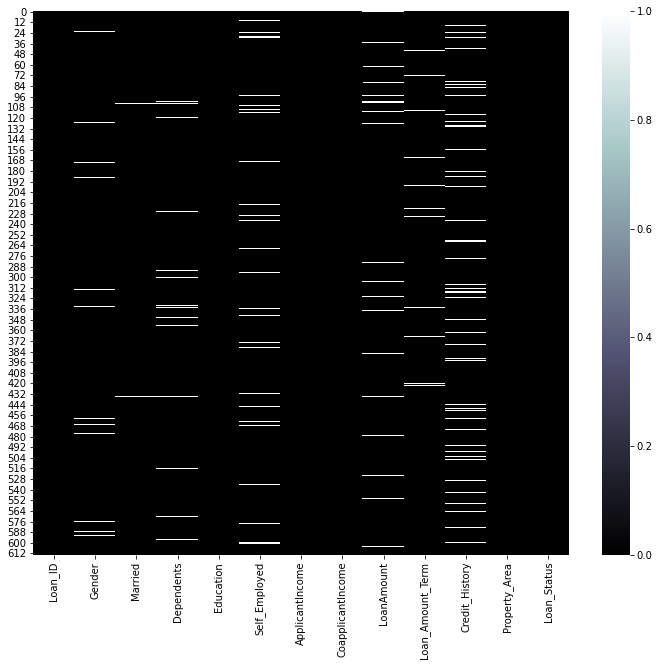

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull() ,cmap="bone")

In [5]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# replace
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")

Modcol=["Gender","Married","Dependents","Self_Employed"]
for i in Modcol:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    
imp1= SimpleImputer(strategy="mean")
meancol=["LoanAmount","Loan_Amount_Term","Credit_History"] 
for i in meancol:
    df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))   
   

In [7]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
479,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,146.412162,360.0,1.0,Urban,N
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
524,LP002697,Male,No,0,Graduate,No,4680,2087.0,146.412162,360.0,1.0,Semiurban,N
340,LP002115,Male,Yes,3+,Not Graduate,No,2647,1587.0,173.000000,360.0,1.0,Rural,N
564,LP002832,Male,Yes,2,Graduate,No,8799,0.0,258.000000,360.0,0.0,Urban,N


<AxesSubplot:>

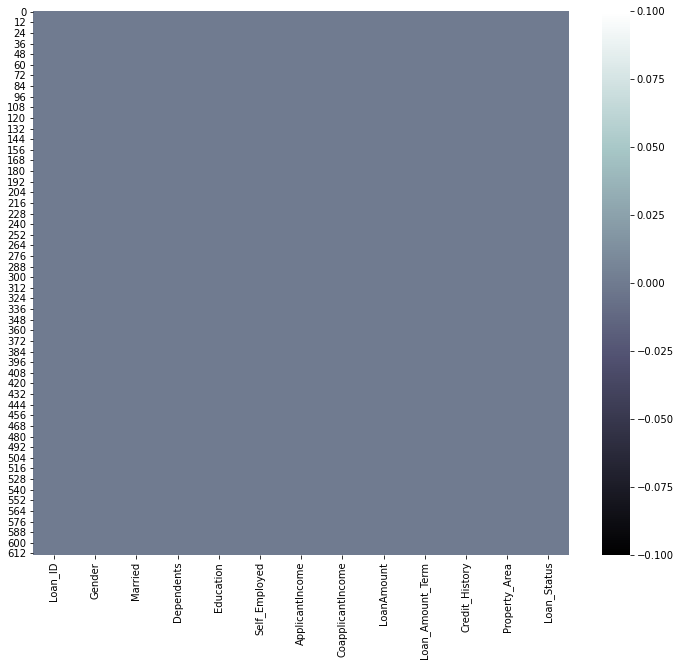

In [8]:
#checking the null values again 
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull() ,cmap="bone")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

encod=["Loan_ID","Gender","Married","Education","Dependents","Self_Employed",
       "Property_Area","Loan_Status"]
for val in encod:
    df[val]=le.fit_transform(df[val].astype(str))
    #as type describes that the data present are in str format
    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [12]:
#checking for unique values 
for i in df:
    print(i , df[i].unique())

Loan_ID [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 24

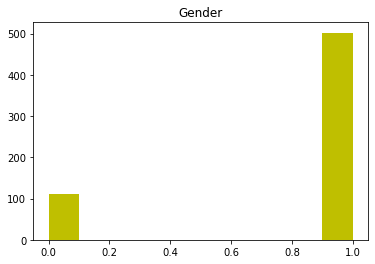

In [13]:
plt.title ("Gender")
plt.hist(df["Gender"] , color="y",align="mid")
plt.show()

<AxesSubplot:>

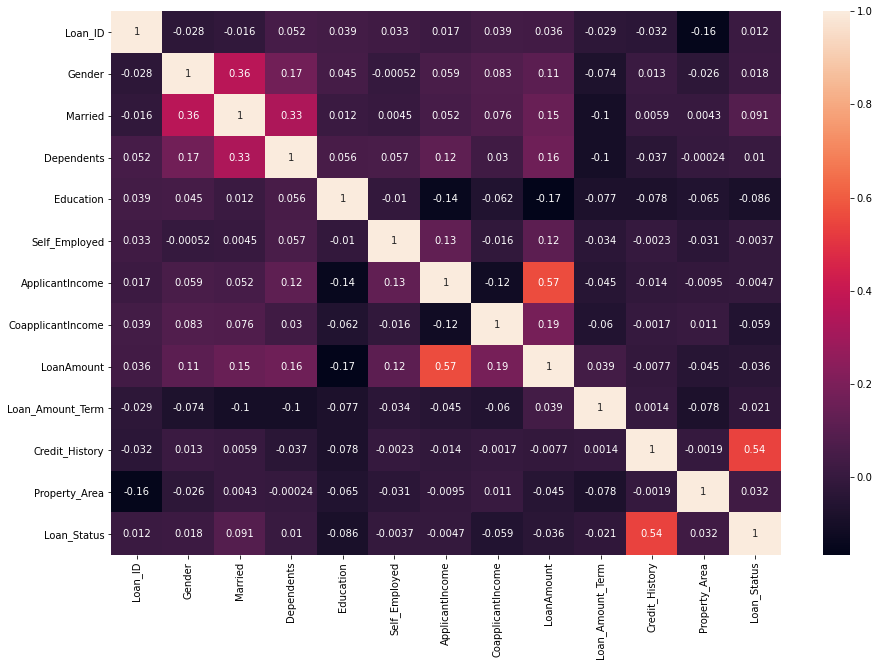

In [14]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [15]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Loan_ID                 AxesSubplot(0.125,0.657941;0.133621x0.222059)
Gender               AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Married               AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Dependents           AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Education            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Self_Employed           AxesSubplot(0.125,0.391471;0.133621x0.222059)
ApplicantIncome      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
CoapplicantIncome     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
LoanAmount           AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Loan_Amount_Term     AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Credit_History             AxesSubplot(0.125,0.125;0.133621x0.222059)
Property_Area           AxesSubplot(0.285345,0.125;0.133621x0.222059)
Loan_Status              AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

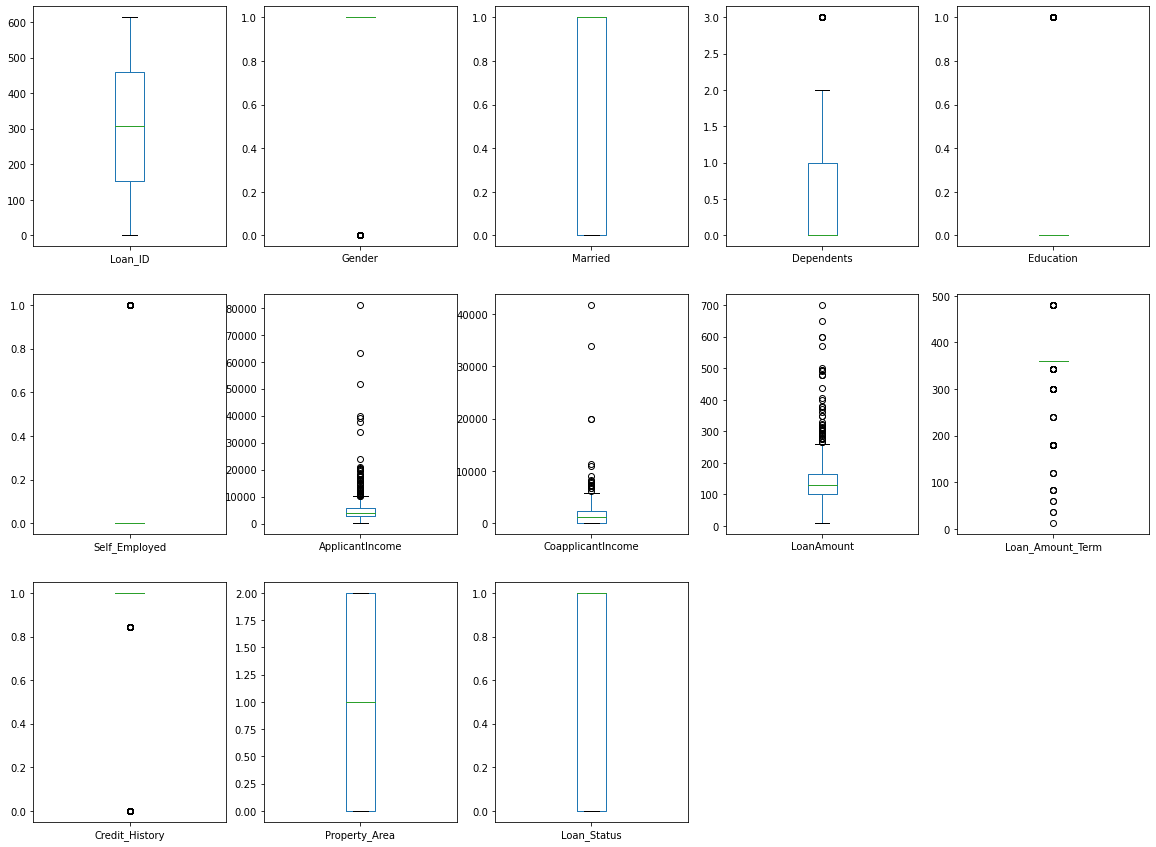

In [16]:
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(3,5) , figsize=(20,15))

In [17]:
df["Dependents"].unique()

array([0, 1, 2, 3])

<AxesSubplot:xlabel='ApplicantIncome'>

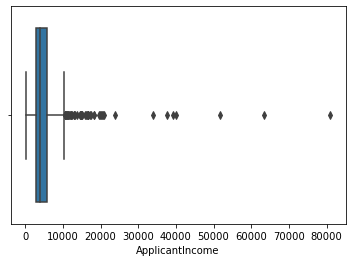

In [18]:
sns.boxplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

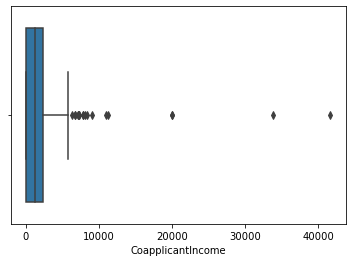

In [19]:
sns.boxplot(df["CoapplicantIncome"])

In [20]:
df.shape

(614, 13)

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [22]:
df.shape

(577, 13)

In [23]:
577/614

0.9397394136807817

<AxesSubplot:>

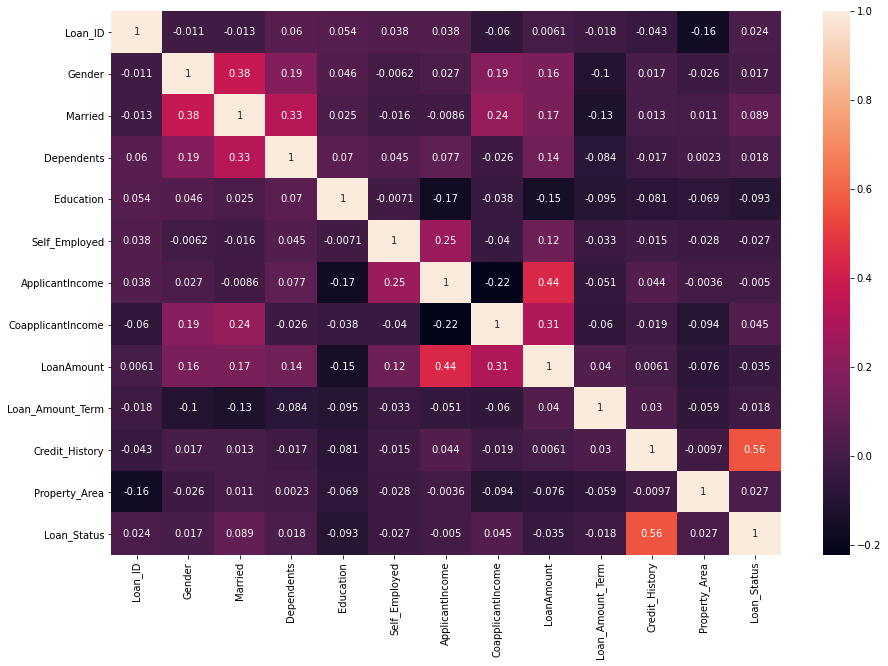

In [24]:
#checking the corelation again 
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [25]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

2.148522232025973


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

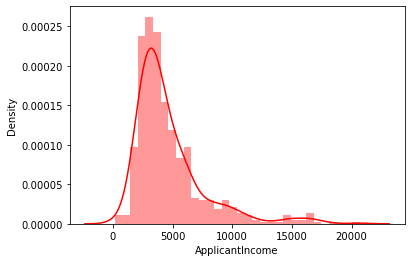

In [26]:
print(df["ApplicantIncome"].skew())
sns.distplot(df["ApplicantIncome"] ,color="r")

1.2086126392712866


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

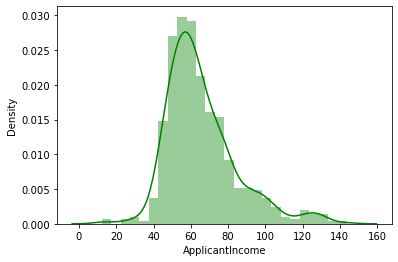

In [27]:
df["ApplicantIncome"]=np.sqrt(df["ApplicantIncome"])
print(df["ApplicantIncome"].skew())
sns.distplot(df["ApplicantIncome"] ,color="g")

1.3505169763920721


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

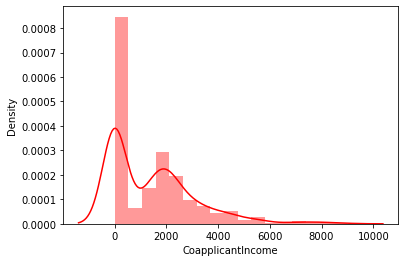

In [28]:
print(df["CoapplicantIncome"].skew())
sns.distplot(df["CoapplicantIncome"] ,color="r")

0.2075911285132824


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

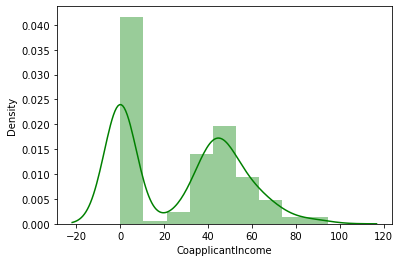

In [29]:
df["CoapplicantIncome"]=np.sqrt(df["CoapplicantIncome"])
print(df["CoapplicantIncome"].skew())
sns.distplot(df["CoapplicantIncome"] ,color="g")

1.1131318857924217


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

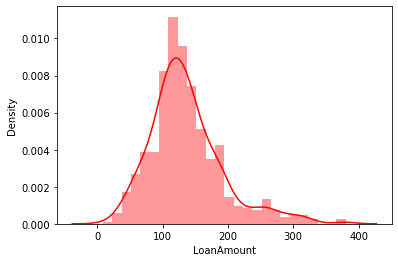

In [30]:
print(df["LoanAmount"].skew())
sns.distplot(df["LoanAmount"] ,color="r")

0.32037194343605385


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

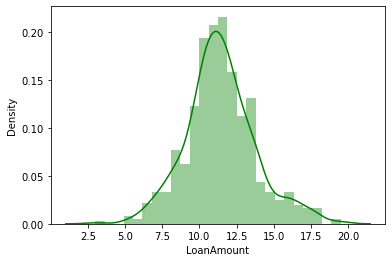

In [31]:
df["LoanAmount"]=np.sqrt(df["LoanAmount"])
print(df["LoanAmount"].skew())
sns.distplot(df["LoanAmount"] ,color="g")

-2.077031480435139


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

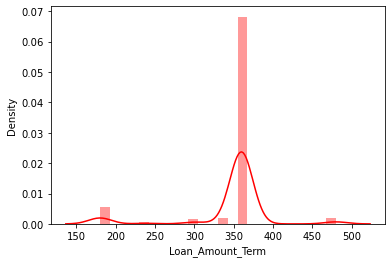

In [32]:
print(df["Loan_Amount_Term"].skew())
sns.distplot(df["Loan_Amount_Term"] ,color="r")

In [33]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [34]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
127,127,1,0,0,0,0,62.169124,40.496913,12.100089,360.0,1.0,0,1
598,598,1,1,0,0,1,99.814829,0.000000,13.416408,360.0,1.0,0,1
496,496,1,1,0,1,0,50.990195,41.231056,10.344080,360.0,1.0,0,1


In [35]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [36]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

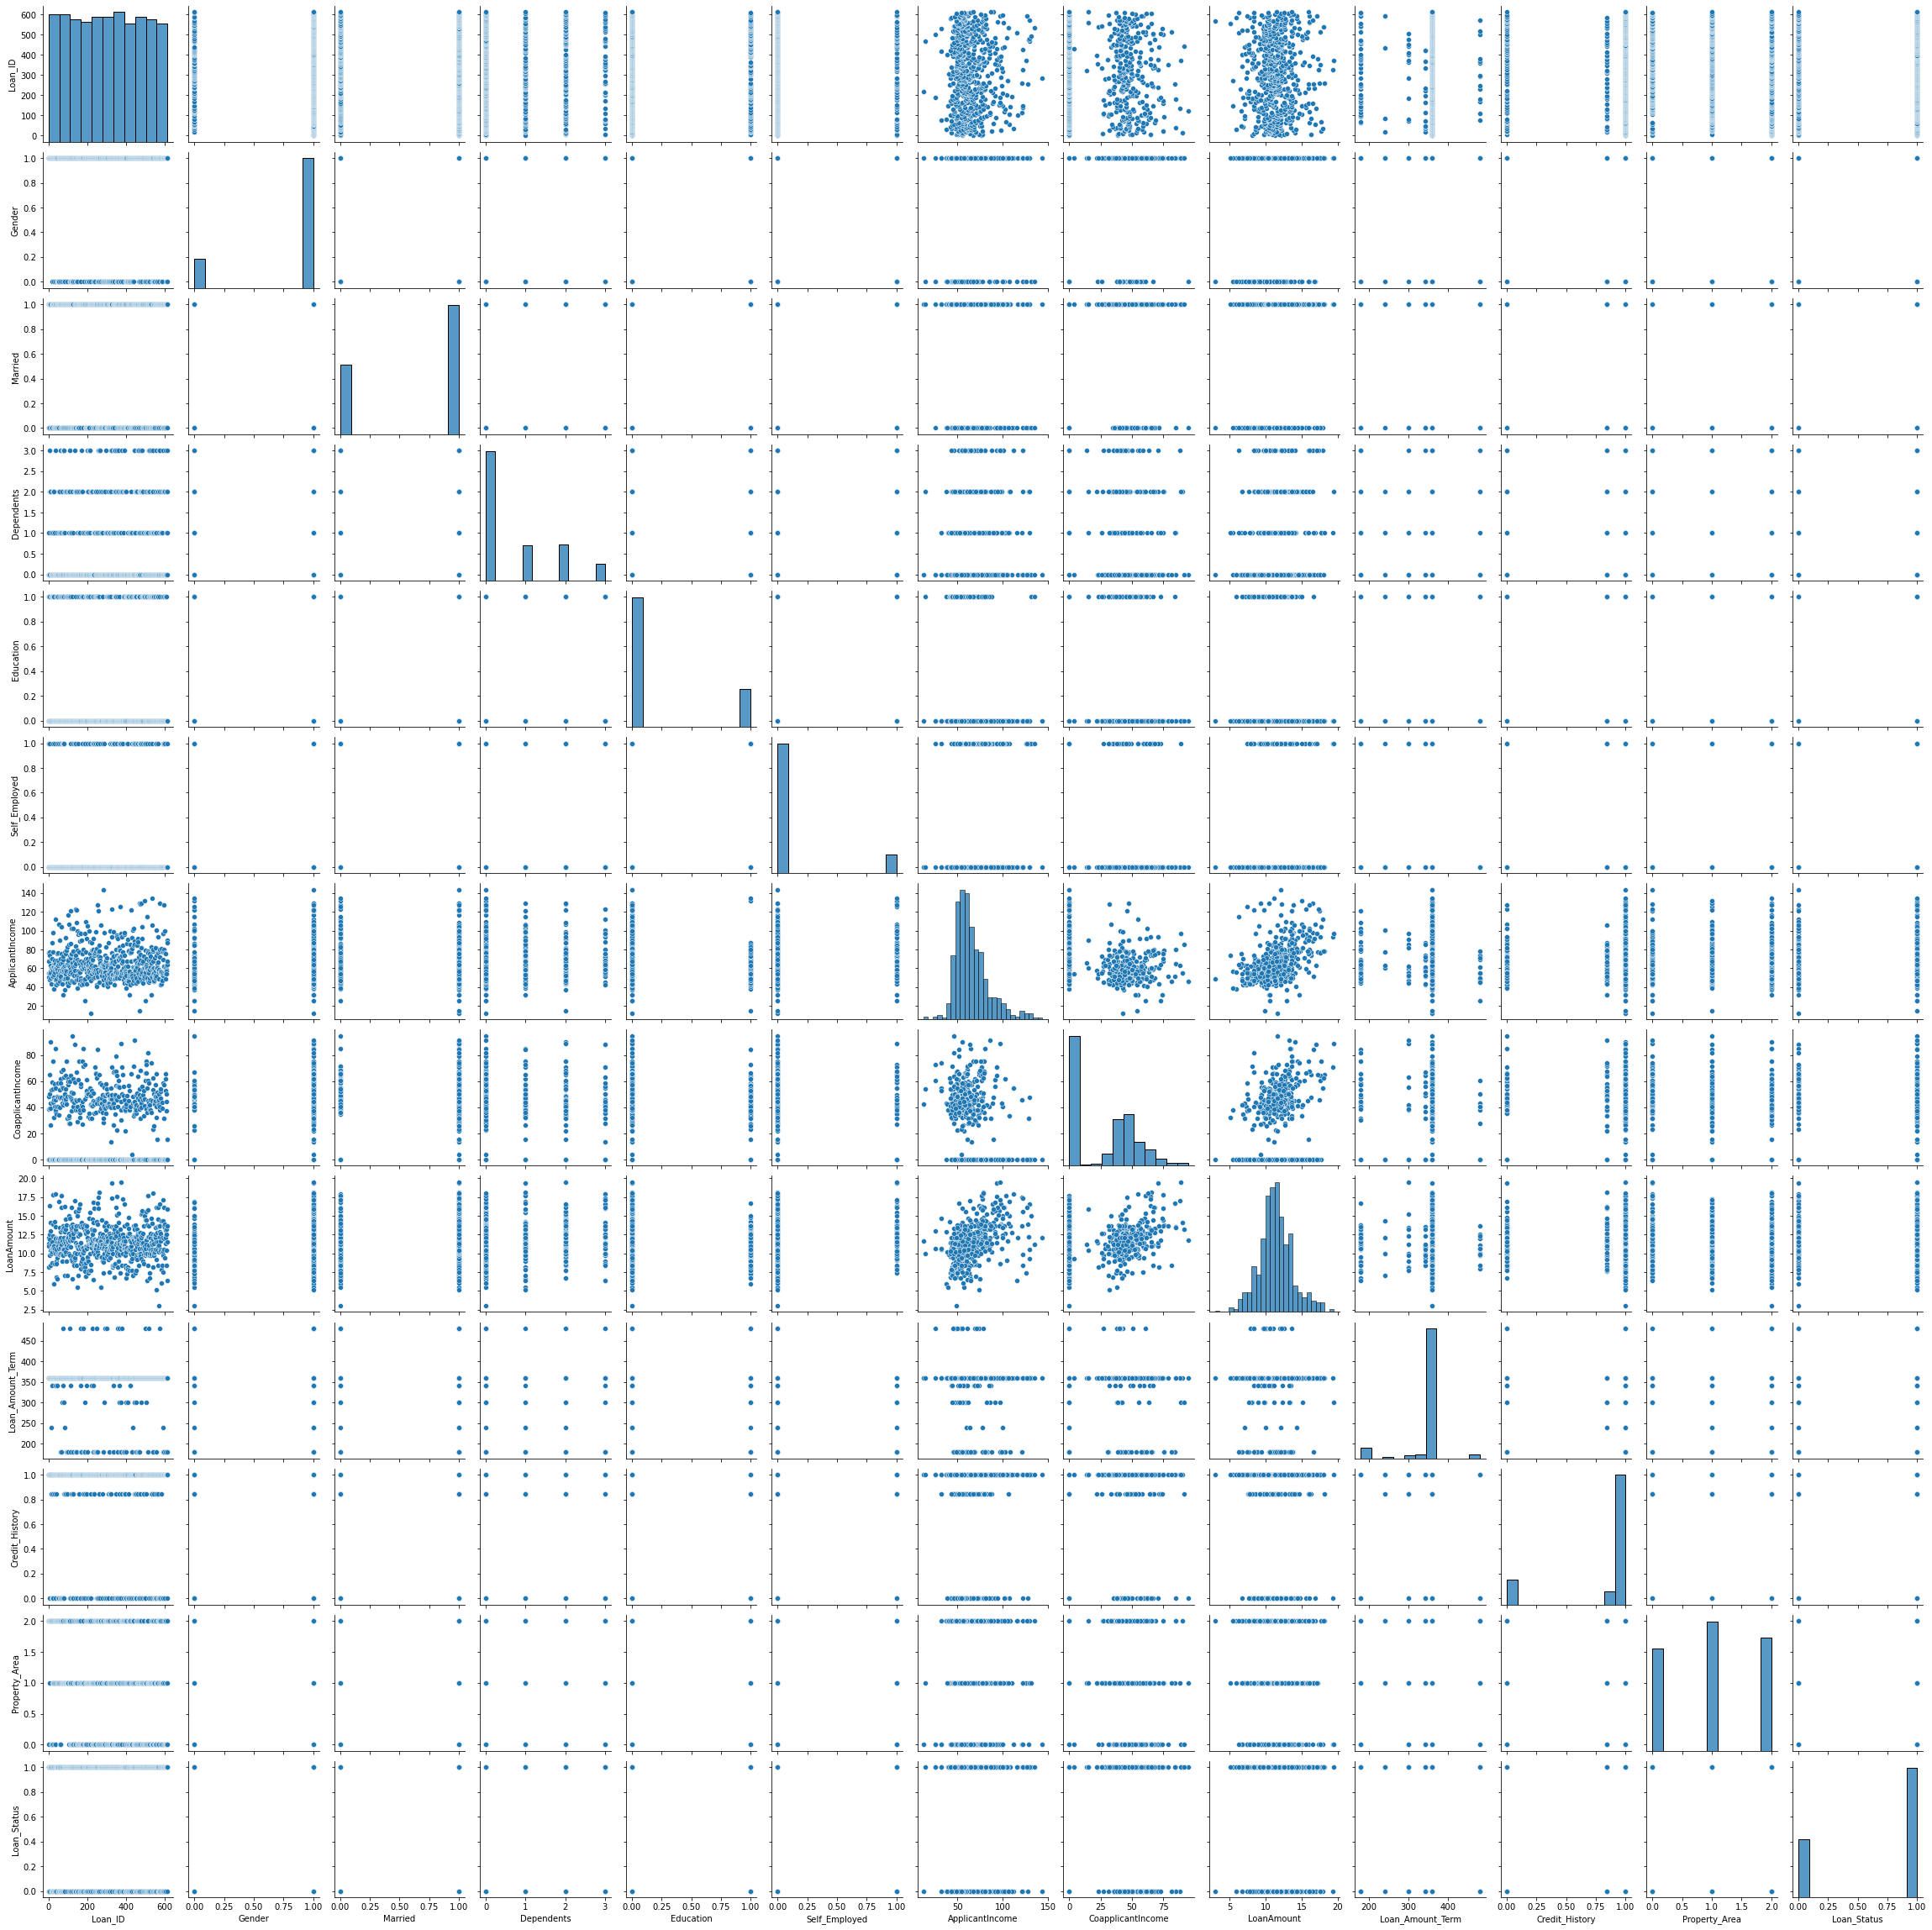

In [37]:
sns.pairplot(df)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)

calc_vif(df)

,variables,VIF FACTOR
0,Loan_ID,3.939988
1,Gender,6.416156
2,Married,3.964844
3,Dependents,1.792385
4,Education,1.320032
5,Self_Employed,1.218695
6,ApplicantIncome,22.069764
7,CoapplicantIncome,3.318535
8,LoanAmount,39.158193
9,Loan_Amount_Term,22.531208


<AxesSubplot:>

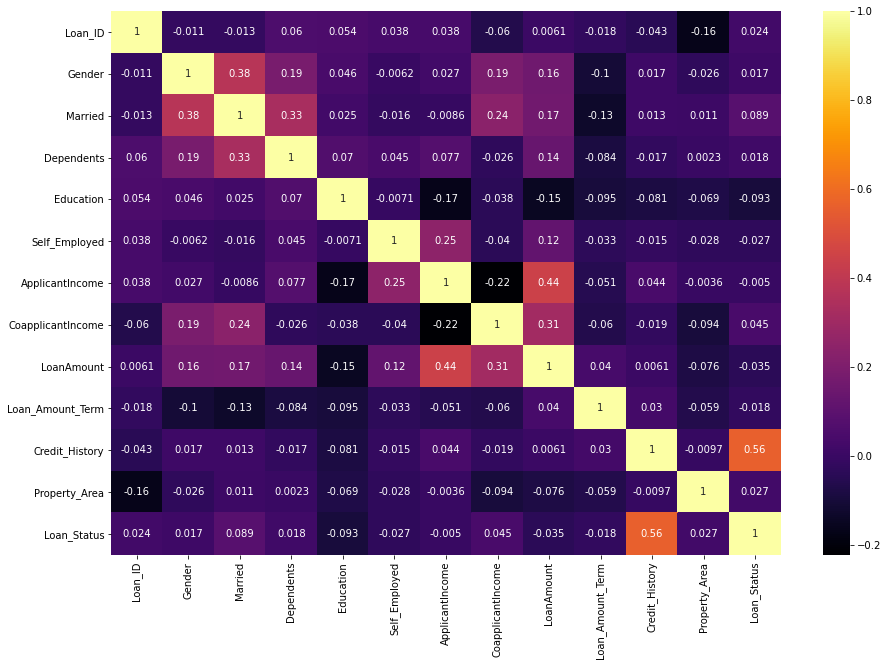

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(cor , annot=True,cmap="inferno")

### Working towards primary fuel prediction  . 

In [40]:
# splitting target 
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

from sklearn.model_selection import train_test_split 

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running before using PCA 

best accuracy  is  0.8218390804597702 with random state  24


In [42]:
df.shape

(577, 13)

In [43]:
x.shape

(577, 12)

In [44]:
from sklearn.decomposition import PCA
PCa=PCA(n_components=6)

In [45]:
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running after using PCA 

best accuracy  is  0.7931034482758621 with random state  112


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=112)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [54]:
from sklearn.tree import DecisionTreeRegressor

DTC=DecisionTreeRegressor()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        51
           1       0.87      0.85      0.86       123

    accuracy                           0.80       174
   macro avg       0.76      0.77      0.76       174
weighted avg       0.80      0.80      0.80       174



In [55]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
acc2=classification_report(y_test,pred)
print(acc2)

              precision    recall  f1-score   support

           0       0.75      0.47      0.58        51
           1       0.81      0.93      0.87       123

    accuracy                           0.80       174
   macro avg       0.78      0.70      0.72       174
weighted avg       0.79      0.80      0.78       174



In [56]:
from sklearn.svm import SVC

SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.71      1.00      0.83       123

    accuracy                           0.71       174
   macro avg       0.35      0.50      0.41       174
weighted avg       0.50      0.71      0.59       174



In [57]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.81      0.98      0.89       123

    accuracy                           0.82       174
   macro avg       0.86      0.71      0.74       174
weighted avg       0.84      0.82      0.80       174



In [58]:
# Cross validation
from sklearn.model_selection import cross_val_score

models=(DTC,RF,SVCc,lg)
for i in models:
    print (i , cross_val_score(i,x,y,cv=15).mean()*100)

DecisionTreeRegressor() -21.826857924684013
RandomForestClassifier() 79.5906432748538
SVC() 68.97435897435896
LogisticRegression() 81.83085919928025


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters={"max_features":["auto","sqrt","log2"],
            "criterion":["gini","entropy"],
            "n_estimators":np.arange(1,10),
           "max_depth":np.arange(1,10)}

## using hyper parameter

In [62]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=15)

#note - keeping the cv value  higher for  better result 

In [63]:
RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [65]:
#getting the best params 
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 8}

In [66]:
#saving best model with  GCV 
LoanPredict_model=RandomForestClassifier(criterion="gini",max_depth=5,max_features="log2",n_estimators=5)
LoanPredict_model.fit(x_train,y_train)
pred=LoanPredict_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

80.45977011494253


In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [68]:
pred_y_proba=LoanPredict_model.predict_proba(x_test)[:,1]
pred_y_proba

array([0.17      , 0.68740847, 0.7418511 , 0.81639925, 0.17138889,
       0.48714228, 0.81700945, 0.76012203, 0.85023594, 0.7738511 ,
       0.80189149, 0.78194909, 0.8818972 , 0.75736032, 0.84891474,
       0.83123314, 0.67616723, 0.788376  , 0.72744761, 0.71132762,
       0.81286032, 0.7418511 , 0.75736032, 0.84486032, 0.83794591,
       0.81286032, 0.78883798, 0.78362056, 0.76012203, 0.80189149,
       0.8730026 , 0.77374921, 0.7418511 , 0.59839002, 0.78883798,
       0.76012203, 0.7418511 , 0.17138889, 0.80623314, 0.06343434,
       0.17138889, 0.71376376, 0.90450945, 0.63333333, 0.21284369,
       0.83772686, 0.87378129, 0.70133333, 0.73145594, 0.79923314,
       0.92039092, 0.78243174, 0.17138889, 0.6668924 , 0.80450945,
       0.20072248, 0.83339833, 0.83411371, 0.73145594, 0.73879441,
       0.69283447, 0.84228756, 0.76012203, 0.82211428, 0.87250945,
       0.13728814, 0.79341474, 0.80246516, 0.79923314, 0.70856387,
       0.79923314, 0.87378129, 0.69799428, 0.58034482, 0.77385

In [69]:
# constant synax #
fpr,tpr,thresholds=roc_curve(y_test, pred_y_proba)

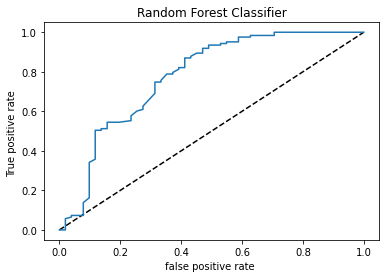

In [70]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr ,tpr,label="final_model")
plt.xlabel("false positive rate ")
plt.ylabel( "True positive rate ")
plt.title( "Random Forest Classifier" )
plt.show()

### saving  final model 

In [71]:
import joblib
joblib.dump(LoanPredict_model,"LoanPredict_model.pkl")

['LoanPredict_model.pkl']